In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf
import mplfinance as mpf

In [4]:
pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [5]:
start_date='2014-01-01'
end_date='2024-12-21'

stock='GOOG'

data=yf.download(stock,start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


DATA CLEANING AND ANALYSIS

In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-12-16,194.365005,200.639999,194.110001,198.160004,198.160004,32248600
2024-12-17,198.529999,202.880005,196.690002,197.119995,197.119995,24129500
2024-12-18,196.830002,198.690002,189.279999,190.149994,190.149994,27638400
2024-12-19,193.279999,194.600006,189.520004,189.699997,189.699997,26981200
2024-12-20,187.009995,194.134995,186.369995,192.960007,192.960007,45319700


In [7]:
data.reset_index(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20184\2565748210.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


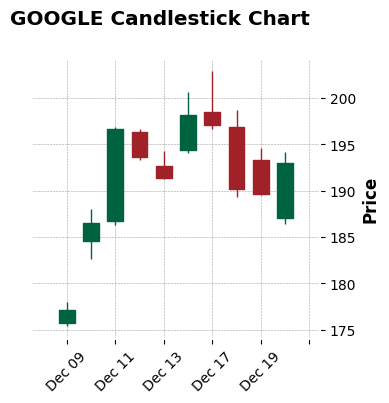

In [8]:
data_last_20 = data.tail(10)
data_last_20.set_index('Date',inplace=True)
my_style = mpf.make_mpf_style(
    base_mpf_style='charles',
    rc={'figure.facecolor': 'white', 'axes.labelsize': 12, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
)
fig, axlist = mpf.plot(
    data_last_20, 
    type='candle', 
    style=my_style, 
    title='GOOGLE Candlestick Chart', 
    figsize=(4,4), 
    returnfig=True
)

# Customize the chart further if needed
fig.tight_layout()
plt.show()

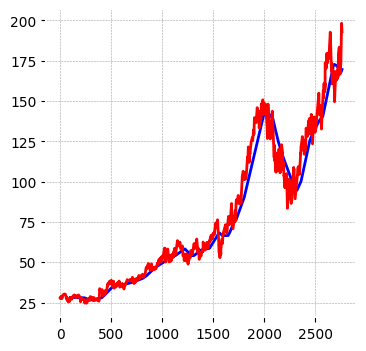

In [9]:
ma_100_days= data.Close.rolling(100).mean()
plt.figure(figsize=(4,4))
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'r')


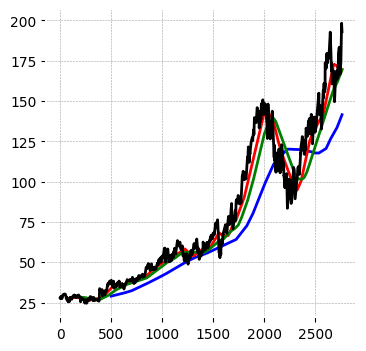

In [10]:
ma_200_days=data.Close.rolling(200).mean()
ma_500_days= data.Close.rolling(500).mean()
plt.figure(figsize=(4,4))
plt.plot(ma_500_days,'b')
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'g')
plt.plot(data.Close,'black');

Text(0.5, 1.0, 'Volume Traded')

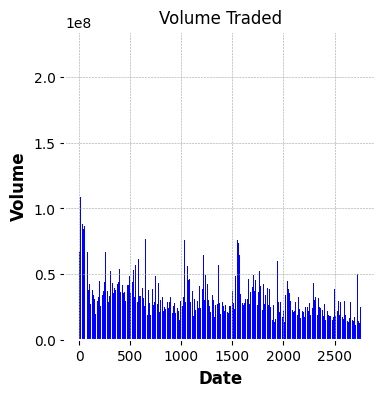

In [11]:
fig5 = plt.figure(figsize=(4,4))
plt.bar(data.index, data['Volume'], color='blue')
plt.xlabel('Date')   
plt.ylabel('Volume')
plt.title('Volume Traded')

In [12]:
data.dropna(inplace=True)


DATA SPLITING

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_test.shape[0]

553

In [15]:
data_train.shape[0]

2209

In [16]:
print(data_test.shape[0]+data_train.shape[0])
print(data.shape)

2762
(2762, 7)


SLICING WITH MinMaxScaler

In [17]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    


In [20]:
x, y = np.array(x), np.array(y)

In [21]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [22]:
model=Sequential([
    LSTM(units=50,activation='relu',return_sequences= True, input_shape=(x.shape[1],1)),
    Dropout(0.2),
    LSTM(units=60,activation='relu',return_sequences= True),
    Dropout(0.3),
    LSTM(units=80,activation='relu',return_sequences= True),
    Dropout(0.4),
    LSTM(units=120,activation='relu'),
    Dropout(0.5),
    Dense(units=1)
])
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0596
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0084
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0062
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0048
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0049
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0048
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0044
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0034
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0039
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0042
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0039
Epo

In [25]:
pas_100_days=data_train.tail(100)

In [26]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

In [33]:
model.save('stock_prediction_model.keras')